In [1]:
import math
import meep as mp
from meep import mpb

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#屈折率
n_Air = 1
n_Si = np.sqrt(15.26)

#穴の半径
r = 1/10

#穴シフト
R = 1

#計算する固有周波数の数
num_bands = 12

#メッシュの細かさ
resolution = 64

h = 20

#-------------------------------------------------------------------#

#単位格子
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(1./2, np.sqrt(3)/2),
                              basis2=mp.Vector3(1./2, -np.sqrt(3)/2))



#構造
geometry = [
            mp.Cylinder(r, center=mp.Vector3(1/3, 1/3)*R, height=h,
                        material=mp.Medium(epsilon=n_Si**2)),
            
            mp.Cylinder(r, center=mp.Vector3(1/3, 0)*R, height=h,
                        material=mp.Medium(epsilon=n_Si**2)),

            mp.Cylinder(r, center=mp.Vector3(0, -1/3)*R, height=h,
                        material=mp.Medium(epsilon=n_Si**2)),

            mp.Cylinder(r, center=mp.Vector3(-1/3, -1/3)*R, height=h,
                        material=mp.Medium(epsilon=n_Si**2)),

            mp.Cylinder(r, center=mp.Vector3(-1/3, 0)*R, height=h,
                        material=mp.Medium(epsilon=n_Si**2)),
    
            mp.Cylinder(r, center=mp.Vector3(0, 1/3)*R, height=h,
                        material=mp.Medium(epsilon=n_Si**2))
           ]

#ブリルアンゾーン
k_points = [
    mp.Vector3(),               # Gamma
    mp.Vector3(1./2, 0),          # M
    mp.Vector3(1./3, 1./3),    # K
    mp.Vector3(),               # Gamma
]
k_points = mp.interpolate(28, k_points)

In [3]:
#計算
ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands
)

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(-1./3, 1./3),
                               mpb.fix_efield_phase,
                               mpb.output_efield_z))
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list

Initializing eigensolver data
Computing 12 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 64 x 64 x 1.
Solving for 6 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.5, 0.866025, 0)
     (0.5, -0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, 0.57735, -0)
     (1, -0.57735, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0.333333,0.333333,0)
          radius 0.1, height 20, axis (0, 0, 1)
     cylinder, center = (0.333333,0,0)
          radius 0.1, height 20, axis (0, 0, 1)
     cylinder, center = (0,-0.333333,0)
          radius 0.1, height 20, axis (0, 0, 1)
     cylinder, center = (-0.333333,-0.333333,0)
          radius 0.1, height 20, axis (0, 0, 1)
     cylinder, center = (-0.333333,0,0)
          radius 0.1, height 20, axis (0, 0, 1)
     cylinder, center = (0,0.333333,0)
          radius 0.1, height 20, axis (0, 0, 1)
Geometric object tree has depth 3 and 6 object 

tmfreqs:, 6, 0.0862069, 0, 0, 0.0995431, 0.0490824, 0.438028, 0.442145, 0.469339, 0.473164, 0.596919, 0.796166, 0.7962, 0.93497, 0.936335, 0.973645, 0.975388
elapsed time for k point: 0.2240447998046875
solve_kpoint (0.103448,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5 mean iterations/band.
tmfreqs:, 7, 0.103448, 0, 0, 0.119452, 0.0588693, 0.433464, 0.439397, 0.471099, 0.476523, 0.596287, 0.797648, 0.797702, 0.934359, 0.936257, 0.970986, 0.973487
elapsed time for k point: 0.21247625350952148
solve_kpoint (0.12069,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5 mean iterations/band.
tmfreqs:, 8, 0.12069, 0, 0, 0.13936, 0.0686401, 0.428646, 0.43673, 0.472641, 0.479912, 0.595541, 0.799375, 0.79

Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5 mean iterations/band.
tmfreqs:, 25, 0.413793, 0, 0, 0.477807, 0.229462, 0.315125, 0.407399, 0.479005, 0.537685, 0.566538, 0.854294, 0.855199, 0.895249, 0.908706, 0.938004, 0.945769
elapsed time for k point: 0.23070001602172852
solve_kpoint (0.431034,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5 mean iterations/band.
tmfreqs:, 26, 0.431034, 0, 0, 0.497716, 0.23843, 0.307018, 0.406782, 0.478941, 0.540848, 0.563972, 0.857693, 0.85932, 0.89153, 0.905329, 0.938506, 0.944717
elapsed time for k point: 0.236863374710083
solve_kpoint (0.448276,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Fi

Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5 mean iterations/band.
tmfreqs:, 43, 0.425287, 0.149425, 0, 0.596373, 0.281627, 0.281632, 0.377924, 0.49872, 0.549133, 0.549153, 0.870716, 0.880106, 0.880211, 0.899198, 0.930114, 0.930235
elapsed time for k point: 0.2236323356628418
solve_kpoint (0.41954,0.16092,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5 mean iterations/band.
tmfreqs:, 44, 0.41954, 0.16092, 0, 0.599357, 0.282896, 0.282901, 0.374336, 0.501066, 0.548543, 0.548563, 0.871521, 0.880771, 0.880881, 0.899464, 0.928563, 0.928688
elapsed time for k point: 0.23999619483947754
solve_kpoint (0.413793,0.172414,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Fin

Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5 mean iterations/band.
tmfreqs:, 61, 0.310345, 0.310345, 0, 0.62069, 0.291887, 0.320544, 0.320553, 0.531241, 0.531258, 0.543924, 0.883538, 0.883595, 0.895421, 0.907231, 0.907297, 0.907488
elapsed time for k point: 0.20079588890075684
solve_kpoint (0.298851,0.298851,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5 mean iterations/band.
tmfreqs:, 62, 0.298851, 0.298851, 0, 0.597701, 0.282174, 0.325638, 0.325647, 0.528931, 0.528947, 0.547834, 0.879535, 0.879573, 0.898494, 0.908668, 0.909341, 0.909431
elapsed time for k point: 0.17624640464782715
solve_kpoint (0.287356,0.287356,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.

Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 8 iterations.
Finished k-point with 6.5 mean iterations/band.
tmfreqs:, 79, 0.103448, 0.103448, 0, 0.206897, 0.101628, 0.41842, 0.418424, 0.484997, 0.485005, 0.592168, 0.80704, 0.807047, 0.931041, 0.934838, 0.961398, 0.961479
elapsed time for k point: 0.29282402992248535
solve_kpoint (0.091954,0.091954,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 8 iterations.
Finished k-point with 6.5 mean iterations/band.
tmfreqs:, 80, 0.091954, 0.091954, 0, 0.183908, 0.0904305, 0.423305, 0.423309, 0.482196, 0.482203, 0.593462, 0.80416, 0.804167, 0.932063, 0.935347, 0.964318, 0.964394
elapsed time for k point: 0.23647379875183105
solve_kpoint (0.0804598,0.0804598,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterat

Solving for bands 2 to 7...
Finished solving for bands 2 to 7 after 19 iterations.
Solving for bands 8 to 12...
Finished solving for bands 8 to 12 after 19 iterations.
Finished k-point with 17.4167 mean iterations/band.
tefreqs:, 1, 0, 0, 0, 0, 0, 0.842688, 0.842694, 0.842825, 0.842914, 0.85957, 0.859783, 0.939412, 1.03436, 1.2102, 1.21027, 1.21033
elapsed time for k point: 0.7356252670288086
solve_kpoint (0.0172414,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 78 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 18 iterations.
Finished k-point with 48 mean iterations/band.
tefreqs:, 2, 0.0172414, 0, 0, 0.0199086, 0.016368, 0.836743, 0.839725, 0.842046, 0.845782, 0.862577, 0.863345, 0.939391, 1.03434, 1.20926, 1.20943, 1.21127
elapsed time for k point: 1.4350965023040771
solve_kpoint (0.0344828,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 10 iterations.
Solving for bands 7 to 12...
Finished solving

tefreqs:, 19, 0.310345, 0, 0, 0.358355, 0.29262, 0.628682, 0.753496, 0.799313, 0.895055, 0.967487, 0.931964, 0.966775, 1.02713, 1.20205, 1.22447, 1.24053
elapsed time for k point: 2.71517276763916
solve_kpoint (0.327586,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 7 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 8 iterations.
Finished k-point with 7.5 mean iterations/band.
tefreqs:, 20, 0.327586, 0, 0, 0.378264, 0.308624, 0.614475, 0.750154, 0.79785, 0.897536, 0.972399, 0.931046, 0.969824, 1.02611, 1.20192, 1.2273, 1.24209
elapsed time for k point: 0.2278919219970703
solve_kpoint (0.344828,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 87 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 15 iterations.
Finished k-point with 51 mean iterations/band.
tefreqs:, 21, 0.344828, 0, 0, 0.398173, 0.324583, 0.600125, 0.747104, 0.796516, 0.899946, 0.930064, 0.972554, 0.977081

Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 9 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 13 iterations.
Finished k-point with 11 mean iterations/band.
tefreqs:, 38, 0.454023, 0.091954, 0, 0.584627, 0.47124, 0.471277, 0.698561, 0.818919, 0.916445, 0.916474, 0.985411, 1.00848, 1.00859, 1.20433, 1.25178, 1.26114
elapsed time for k point: 0.34122776985168457
solve_kpoint (0.448276,0.103448,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 9 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 13 iterations.
Finished k-point with 11 mean iterations/band.
tefreqs:, 39, 0.448276, 0.103448, 0, 0.586545, 0.4727, 0.47274, 0.691789, 0.823806, 0.916012, 0.916037, 0.98582, 1.0084, 1.00851, 1.2051, 1.25221, 1.26035
elapsed time for k point: 0.38242650032043457
solve_kpoint (0.442529,0.114943,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 9 iterations.
Solving for

Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 9 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 11 iterations.
Finished k-point with 10 mean iterations/band.
tefreqs:, 56, 0.350575, 0.298851, 0, 0.650112, 0.520727, 0.520798, 0.558655, 0.891004, 0.902125, 0.902174, 0.999557, 1.00436, 1.00447, 1.23156, 1.24211, 1.24256
elapsed time for k point: 0.33668041229248047
solve_kpoint (0.344828,0.310345,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 9 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 11 iterations.
Finished k-point with 10 mean iterations/band.
tefreqs:, 57, 0.344828, 0.310345, 0, 0.655475, 0.524741, 0.524813, 0.550203, 0.893699, 0.901002, 0.901053, 1.00066, 1.00388, 1.00399, 1.23382, 1.24091, 1.24135
elapsed time for k point: 0.36191272735595703
solve_kpoint (0.33908,0.321839,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 9 iterations.
Solvin

Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 9 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 12 iterations.
Finished k-point with 10.5 mean iterations/band.
tefreqs:, 74, 0.16092, 0.16092, 0, 0.321839, 0.263132, 0.692453, 0.692477, 0.86106, 0.861106, 0.933376, 0.95947, 0.959487, 1.02883, 1.21006, 1.21014, 1.238
elapsed time for k point: 0.38316893577575684
solve_kpoint (0.149425,0.149425,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 9 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 12 iterations.
Finished k-point with 10.5 mean iterations/band.
tefreqs:, 75, 0.149425, 0.149425, 0, 0.298851, 0.244529, 0.704185, 0.704207, 0.858945, 0.85899, 0.934275, 0.954089, 0.954112, 1.0297, 1.20908, 1.20917, 1.23544
elapsed time for k point: 0.3655669689178467
solve_kpoint (0.137931,0.137931,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 9 iterations.
Solving

In [4]:
#import csv
#with open('epsilon_distribution.csv', 'wt') as f:
#    writer = csv.writer(f)
#    writer.writerows(converted_eps)

epsilon: 1-15.26, mean 4.10378, harm. mean 1.29624, 26.0742% > 1, 21.7656% "fill"


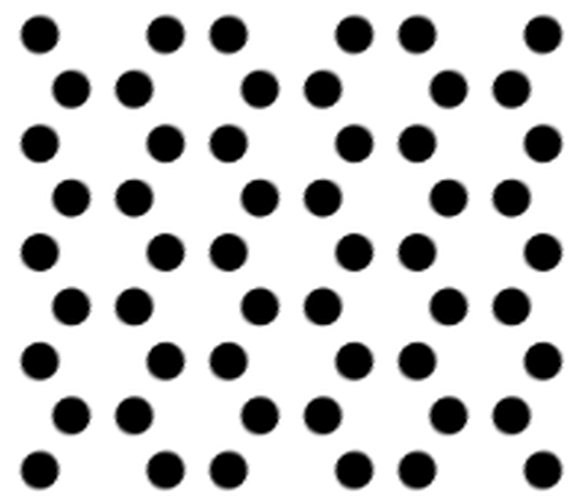

In [5]:
md = mpb.MPBData(rectify=True, periods=3, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
converted_eps.shape

plt.figure(figsize=(12,9))
plt.imshow(converted_eps.T, interpolation='spline36', cmap="binary")
plt.axis('off')
plt.show()

In [6]:
tm_freqs.max()

0.9851600544876508

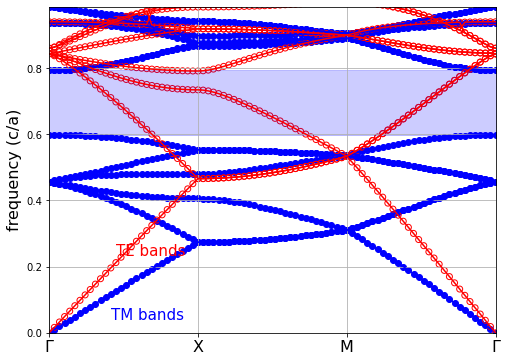

In [7]:
fig, ax = plt.subplots(figsize=(8,6))

x = range(len(tm_freqs))

# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='blue')
    ax.scatter([xz]*len(tez), tez, color='red', facecolors='none')
ax.plot(tm_freqs, color='blue')
ax.plot(te_freqs, color='red')
ax.set_ylim([tm_freqs.min(), tm_freqs.max()])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(12, 0.04, 'TM bands', color='blue', size=15)
ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'X', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()

Initializing eigensolver data
Computing 12 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 64 x 64 x 1.
Solving for 6 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.5, 0.866025, 0)
     (0.5, -0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, 0.57735, -0)
     (1, -0.57735, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0.333333,0.333333,0)
          radius 0.1, height 20, axis (0, 0, 1)
     cylinder, center = (0.333333,0,0)
          radius 0.1, height 20, axis (0, 0, 1)
     cylinder, center = (0,-0.333333,0)
          radius 0.1, height 20, axis (0, 0, 1)
     cylinder, center = (-0.333333,-0.333333,0)
          radius 0.1, height 20, axis (0, 0, 1)
     cylinder, center = (-0.333333,0,0)
          radius 0.1, height 20, axis (0, 0, 1)
     cylinder, center = (0,0.333333,0)
          radius 0.1, height 20, axis (0, 0, 1)
Geometric object tree has depth 3 and 6 object 

tmfreqs:, 4, 0.0517241, 0, 0, 0.0597259, 0.0294709, 0.446381, 0.447868, 0.465122, 0.46655, 0.59784, 0.793977, 0.793989, 0.935821, 0.936473, 0.978602, 0.979253
elapsed time for k point: 0.3372189998626709
solve_kpoint (0.0689655,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5.5 mean iterations/band.
tmfreqs:, 5, 0.0689655, 0, 0, 0.0796345, 0.039282, 0.442335, 0.44497, 0.46735, 0.469838, 0.597437, 0.79494, 0.79496, 0.935456, 0.936407, 0.976184, 0.977311
elapsed time for k point: 0.3035624027252197
solve_kpoint (0.0862069,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5.5 mean iterations/band.
tmfreqs:, 6, 0.0862069, 0, 0, 0.0995431, 0.0490824, 0.438028, 0.442145, 0.469339, 0.473164, 0.596919, 0.796

Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5 mean iterations/band.
tmfreqs:, 23, 0.37931, 0, 0, 0.43799, 0.211309, 0.330967, 0.409036, 0.47914, 0.531217, 0.571417, 0.846958, 0.847045, 0.902324, 0.916004, 0.937173, 0.948053
elapsed time for k point: 0.3216838836669922
solve_kpoint (0.396552,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5 mean iterations/band.
tmfreqs:, 24, 0.396552, 0, 0, 0.457898, 0.22042, 0.32311, 0.408151, 0.479074, 0.534473, 0.56902, 0.850685, 0.851103, 0.898852, 0.912293, 0.93756, 0.946882
elapsed time for k point: 0.36232447624206543
solve_kpoint (0.413793,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finis

Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5 mean iterations/band.
tmfreqs:, 41, 0.436782, 0.126437, 0, 0.591033, 0.279351, 0.279356, 0.384714, 0.494146, 0.550194, 0.550213, 0.869273, 0.878901, 0.878996, 0.898723, 0.93299, 0.933104
elapsed time for k point: 0.38852787017822266
solve_kpoint (0.431034,0.137931,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5 mean iterations/band.
tmfreqs:, 42, 0.431034, 0.137931, 0, 0.593598, 0.280445, 0.28045, 0.381388, 0.496409, 0.549684, 0.549703, 0.869967, 0.879482, 0.879582, 0.898951, 0.931592, 0.931709
elapsed time for k point: 0.5035433769226074
solve_kpoint (0.425287,0.149425,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.

Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 5 iterations.
Finished k-point with 4.5 mean iterations/band.
tmfreqs:, 59, 0.333333, 0.333333, 0, 0.666667, 0.310851, 0.310856, 0.310863, 0.535651, 0.535664, 0.535692, 0.88909, 0.88922, 0.889465, 0.905262, 0.905564, 0.905569
elapsed time for k point: 0.37129878997802734
solve_kpoint (0.321839,0.321839,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5 mean iterations/band.
tmfreqs:, 60, 0.321839, 0.321839, 0, 0.643678, 0.301451, 0.315609, 0.315618, 0.533484, 0.533501, 0.539874, 0.886889, 0.886977, 0.892403, 0.905808, 0.905848, 0.906349
elapsed time for k point: 0.31678318977355957
solve_kpoint (0.310345,0.310345,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 4 iterations.
Solving for bands 7 to 12.

Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 7 iterations.
Finished k-point with 6 mean iterations/band.
tmfreqs:, 77, 0.126437, 0.126437, 0, 0.252874, 0.123905, 0.408254, 0.40826, 0.490476, 0.490485, 0.589137, 0.81358, 0.813586, 0.928765, 0.93337, 0.955383, 0.955472
elapsed time for k point: 0.44495630264282227
solve_kpoint (0.114943,0.114943,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
Solving for bands 7 to 12...
Finished solving for bands 7 to 12 after 8 iterations.
Finished k-point with 6.5 mean iterations/band.
tmfreqs:, 78, 0.114943, 0.114943, 0, 0.229885, 0.112788, 0.4134, 0.413405, 0.487755, 0.487763, 0.590726, 0.810186, 0.810193, 0.929938, 0.934187, 0.958418, 0.958503
elapsed time for k point: 0.6379938125610352
solve_kpoint (0.103448,0.103448,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
So

ValueError: num must be 1 <= num <= 12, not 0

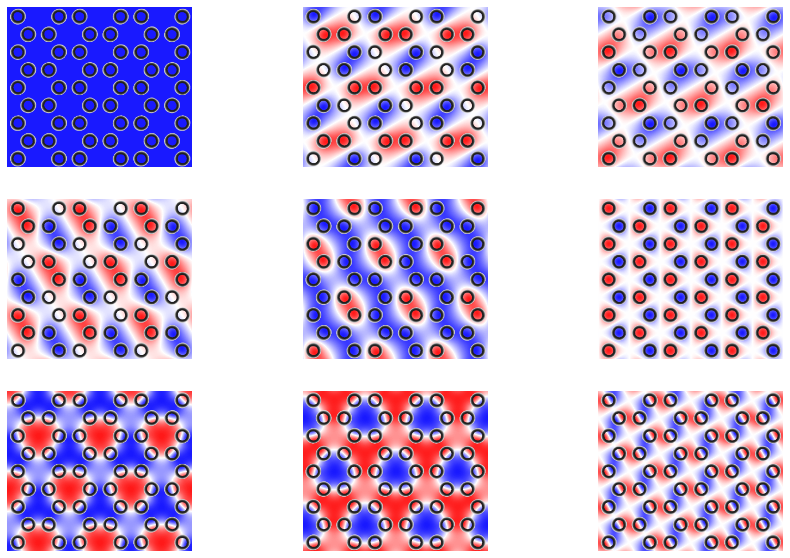

In [8]:
efields = []

def get_efields(ms, band):
    efields.append(ms.get_efield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(), mpb.fix_efield_phase, get_efields))

# Create an MPBData instance to transform the efields
md = mpb.MPBData(rectify=True, resolution=64, periods=3)

converted = []
for f in efields:
    # Get just the z component of the efields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

plt.figure(figsize=(15,10))
    
for i, f in enumerate(converted):
    plt.subplot(331 + i)
    plt.contour(converted_eps.T, cmap='binary')
    plt.imshow(np.real(f).T, interpolation='spline36', cmap='bwr', alpha=0.9)
    plt.axis('off')

plt.show()

In [ ]:
#THz表示
a = 820
c_const = 299792458

fontsize = 18
tm_freqs_THz = np.array(tm_freqs) * c_const/(a*10**3)
tm_gaps_THz = np.array(tm_gaps) * c_const/(a*10**3)
#print(te_freqs_THz)



fig, ax = plt.subplots(figsize=(8,6))

x = range(len(tm_freqs))

for xz, tmz in zip(x, tm_freqs_THz):
    ax.scatter([xz]*len(tmz), tmz, color='olive')

ax.plot(tm_freqs_THz, color='olive')
ax.set_ylim([tm_freqs_THz.min(), tm_freqs_THz.max()])
ax.set_xlim([x[0], x[-1]])

for gap in tm_gaps_THz:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='olive', alpha=0.2)

ax.text(11.5, 0, 'TM bands', color='olive', size=15)

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'K', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=fontsize)
ax.set_ylabel('frequency [THz]', size=fontsize)
plt.tick_params(labelsize=fontsize)
ax.grid(True)

plt.show()

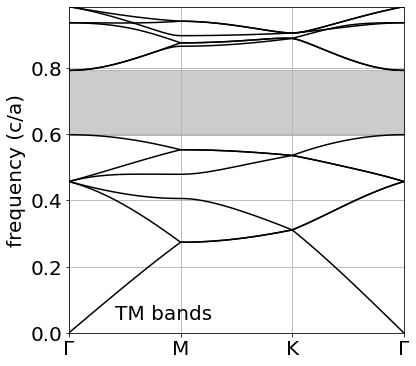

In [11]:
fs = 20

fig, ax = plt.subplots(figsize=(6,6))

x = range(len(tm_freqs))

# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
#for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
#    ax.scatter([xz]*len(tmz), tmz, color='blue')
#    ax.scatter([xz]*len(tez), tez, color='red', facecolors='none')
ax.plot(tm_freqs, color='black')
#ax.plot(te_freqs, color='red')
ax.set_ylim([tm_freqs.min(), tm_freqs.max()])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='black', alpha=0.2)

#for gap in te_gaps:
#    if gap[0] > 1:
#        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(12, 0.04, 'TM bands', color='black', size=fs)
#ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'M', 'K', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=fs)
ax.set_ylabel('frequency (c/a)', size=fs)
ax.grid(True)
plt.tick_params(labelsize=fs)
plt.savefig("2D_pillar_honeycomb_normFreq.png", bbox_inches="tight")

plt.show()

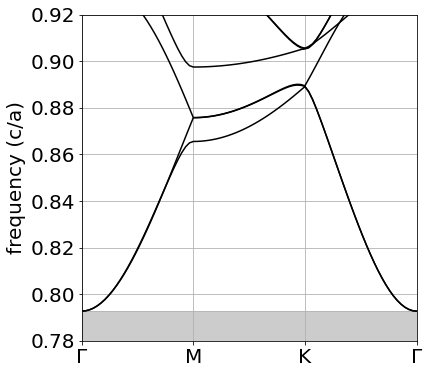

In [9]:
fs = 20

fig, ax = plt.subplots(figsize=(6,6))

x = range(len(tm_freqs))

# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
#for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
#    ax.scatter([xz]*len(tmz), tmz, color='blue')
#    ax.scatter([xz]*len(tez), tez, color='red', facecolors='none')
ax.plot(tm_freqs, color='black')
#ax.plot(te_freqs, color='red')
ax.set_ylim([tm_freqs.min(), tm_freqs.max()])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='black', alpha=0.2)

#for gap in te_gaps:
#    if gap[0] > 1:
#        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
#ax.text(12, 0.04, 'TM bands', color='black', size=15)
#ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

ax.set_ylim([0.78,0.92])

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'M', 'K', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=fs)
ax.set_ylabel('frequency (c/a)', size=fs)
ax.grid(True)

plt.tick_params(labelsize=fs)
plt.savefig("2D_pillar_honeycomb_π_6_normFreq2.png", bbox_inches="tight")

plt.show()